In [1]:
# ============================================================================
# BANK MARKETING - ML CLASSIFICATION PROJECT (COMPLETE)
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import joblib
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("BANK MARKETING CLASSIFICATION - ML PROJECT")
print("="*80)


BANK MARKETING CLASSIFICATION - ML PROJECT


In [3]:
# ============================================================================
# 1. DATA LOADING
# ============================================================================
print("\n" + "="*80)
print("STEP 1: DATA LOADING")
print("="*80)

with zipfile.ZipFile('/content/bank+marketing.zip', 'r') as z:
    z.extractall('/content/bank_marketing')

with zipfile.ZipFile('/content/bank_marketing/bank-additional.zip', 'r') as z:
    z.extractall('/content/bank_marketing')

df = pd.read_csv('/content/bank_marketing/bank-additional/bank-additional-full.csv', sep=';')

print(f"✓ Dataset loaded! Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")
print("\n", df.head())
print("\n", df.info())


STEP 1: DATA LOADING
✓ Dataset loaded! Shape: (41188, 21)
Rows: 41,188 | Columns: 21

    age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         


STEP 2: EXPLORATORY DATA ANALYSIS

 Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

 Target Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


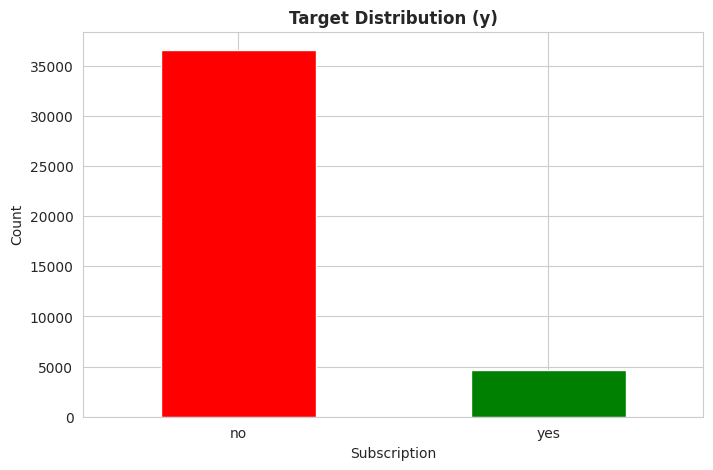


 Numerical Features Statistics:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960  

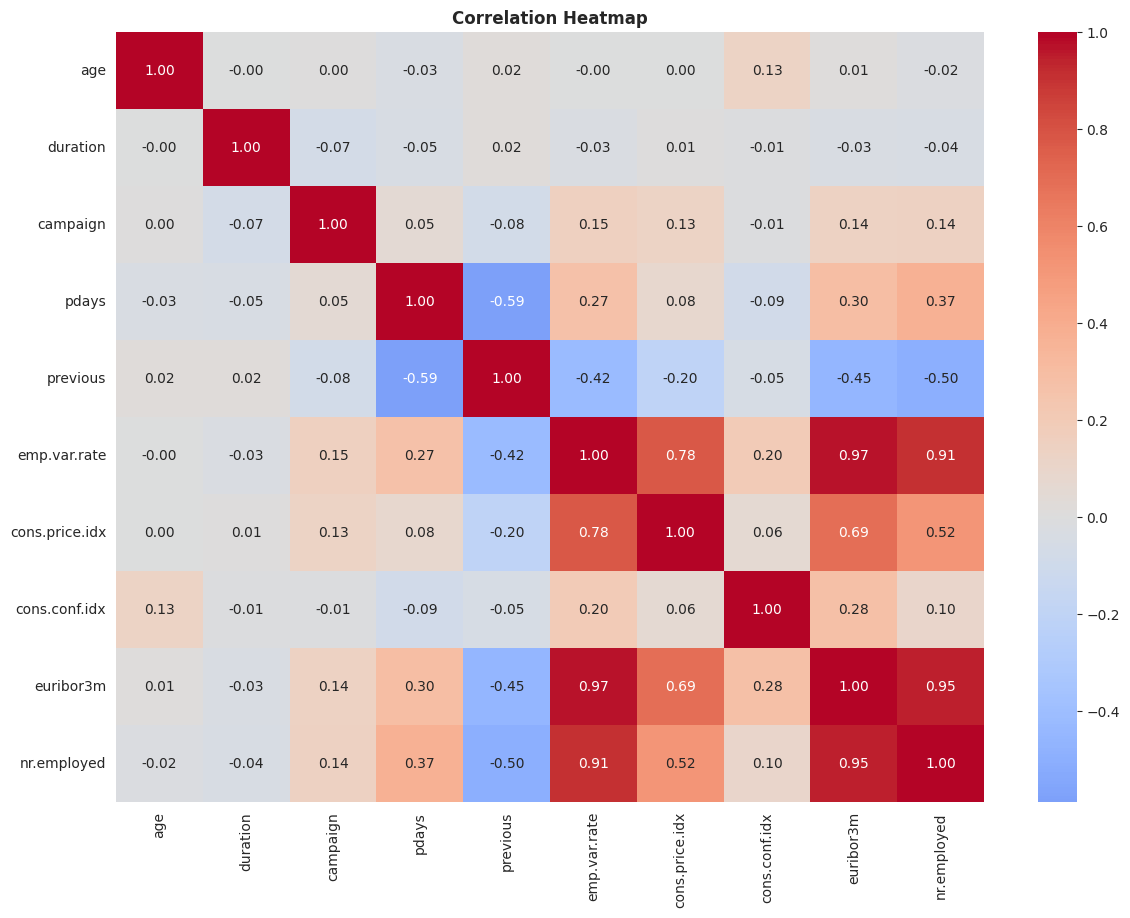

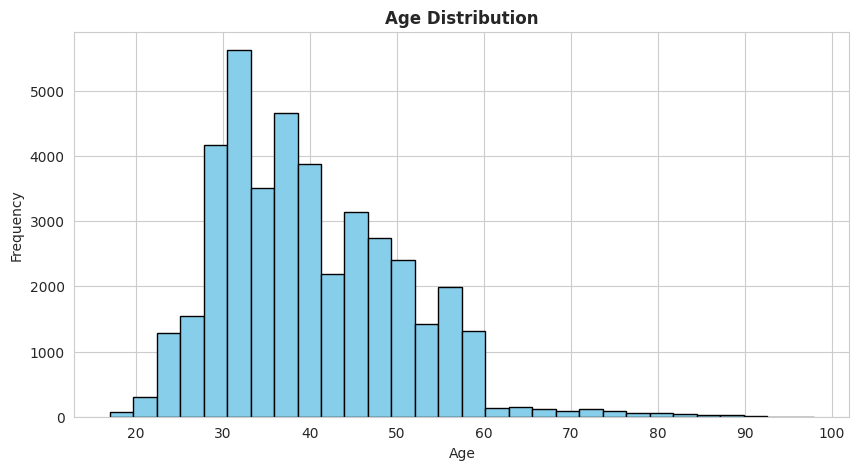

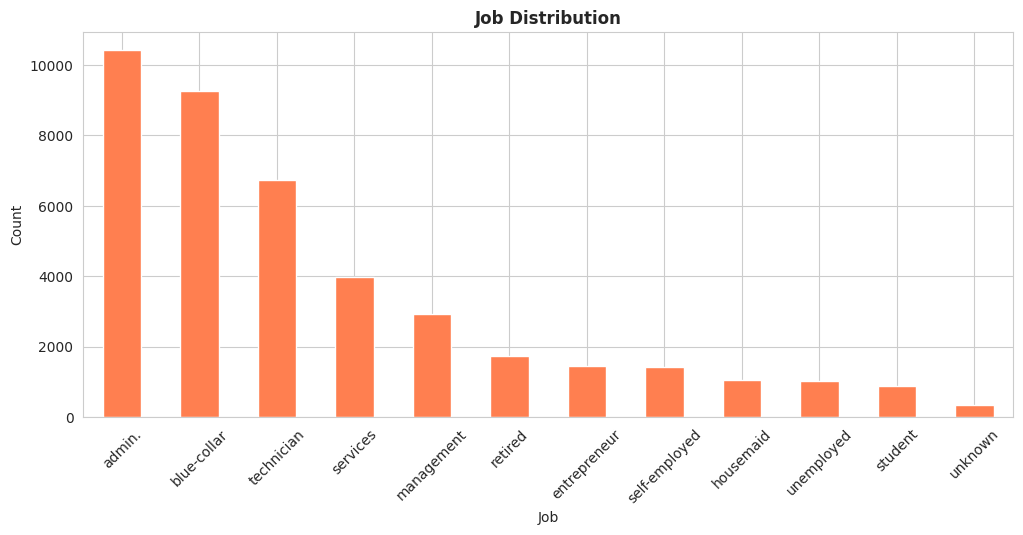

In [20]:
# ============================================================================
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================
print("\n" + "="*80)
print("STEP 2: EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n Missing Values:")
print(df.isnull().sum())

print("\n Target Distribution:")
print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True) * 100)

# Visualize target distribution
plt.figure(figsize=(8, 5))
df['y'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Target Distribution (y)', fontweight='bold')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Numerical Features Statistics:")
print(df.describe())

print("\n Categorical Features:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head())

# Correlation heatmap
print("\n Correlation Analysis:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(14, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontweight='bold')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Age distribution
plt.figure(figsize=(10, 5))
df['age'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Job distribution
plt.figure(figsize=(12, 5))
df['job'].value_counts().plot(kind='bar', color='coral')
plt.title('Job Distribution', fontweight='bold')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('job_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# ============================================================================
# 3. DATA PREPROCESSING
# ============================================================================
print("\n" + "="*80)
print("STEP 3: DATA PREPROCESSING")
print("="*80)

df_processed = df.copy()
df_processed = df_processed.dropna()

print(f"✓ Missing values handled. New shape: {df_processed.shape}")

# Store label encoders
label_encoders = {}
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()

print(f"\n🔧 Encoding {len(categorical_features)} categorical features:")
for col in categorical_features:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"  ✓ {col}: {len(le.classes_)} categories")

# Split features and target
X = df_processed.drop('y', axis=1)
y = df_processed['y']

print(f"\n✓ Features: {X.shape[1]}")
print(f"✓ Samples: {X.shape[0]:,}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n✓ Train: {X_train.shape[0]:,} samples")
print(f"✓ Test: {X_test.shape[0]:,} samples")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✓ Features scaled")


STEP 3: DATA PREPROCESSING
✓ Missing values handled. New shape: (41188, 21)

🔧 Encoding 11 categorical features:
  ✓ job: 12 categories
  ✓ marital: 4 categories
  ✓ education: 8 categories
  ✓ default: 3 categories
  ✓ housing: 3 categories
  ✓ loan: 3 categories
  ✓ contact: 2 categories
  ✓ month: 10 categories
  ✓ day_of_week: 5 categories
  ✓ poutcome: 3 categories
  ✓ y: 2 categories

✓ Features: 20
✓ Samples: 41,188

✓ Train: 32,950 samples
✓ Test: 8,238 samples
✓ Features scaled


In [6]:
# ============================================================================
# 4. MODEL TRAINING & HYPERPARAMETER TUNING
# ============================================================================
print("\n" + "="*80)
print("STEP 4: MODEL TRAINING & HYPERPARAMETER TUNING")
print("="*80)

results = {}

def evaluate_model(name, model, X_tr, X_te, y_tr, y_te, use_scaled=False):
    X_train_use = X_train_scaled if use_scaled else X_tr
    X_test_use = X_test_scaled if use_scaled else X_te

    start = time.time()
    model.fit(X_train_use, y_tr)
    train_time = time.time() - start

    y_pred = model.predict(X_test_use)

    try:
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test_use)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_proba = model.decision_function(X_test_use)
        else:
            y_proba = None
        roc_auc = roc_auc_score(y_te, y_proba) if y_proba is not None else 0
    except:
        roc_auc = 0

    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec = recall_score(y_te, y_pred, zero_division=0)
    f1 = f1_score(y_te, y_pred, zero_division=0)

    cv_scores = cross_val_score(model, X_train_use, y_tr, cv=5, scoring='f1')

    results[name] = {
        'model': model,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'roc_auc': roc_auc,
        'cv_mean': cv_scores.mean(),
        'train_time': train_time
    }

    print(f"\n{name}:")
    print(f"  Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f} | AUC: {roc_auc:.4f} | Time: {train_time:.2f}s")


STEP 4: MODEL TRAINING & HYPERPARAMETER TUNING


In [7]:
# Model 1: Logistic Regression
print("\n" + "-"*60)
print("1. Logistic Regression with GridSearchCV")
lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                  {'C': [0.01, 0.1, 1, 10]}, cv=3, scoring='f1')
lr.fit(X_train_scaled, y_train)
evaluate_model("Logistic Regression", lr.best_estimator_, X_train, X_test, y_train, y_test, True)


------------------------------------------------------------
1. Logistic Regression with GridSearchCV

Logistic Regression:
  Acc: 0.9141 | Prec: 0.7022 | Rec: 0.4116 | F1: 0.5190 | AUC: 0.9365 | Time: 0.56s


In [8]:
# Model 2: SVM
print("\n" + "-"*60)
print("2. SVM")
svm = LinearSVC(max_iter=2000, random_state=42, dual=False)
evaluate_model("SVM", svm, X_train, X_test, y_train, y_test, True)


------------------------------------------------------------
2. SVM

SVM:
  Acc: 0.9121 | Prec: 0.7237 | Rec: 0.3556 | F1: 0.4769 | AUC: 0.9354 | Time: 0.36s


In [9]:

# Model 3: KNN
print("\n" + "-"*60)
print("3. KNN with GridSearchCV")
knn = GridSearchCV(KNeighborsClassifier(),
                   {'n_neighbors': [3, 5, 7, 9]}, cv=3, scoring='f1')
knn.fit(X_train_scaled, y_train)
evaluate_model("KNN", knn.best_estimator_, X_train, X_test, y_train, y_test, True)


------------------------------------------------------------
3. KNN with GridSearchCV

KNN:
  Acc: 0.8978 | Prec: 0.5642 | Rec: 0.4073 | F1: 0.4731 | AUC: 0.8165 | Time: 0.01s


In [10]:
# Model 4: Decision Tree
print("\n" + "-"*60)
print("4. Decision Tree with GridSearchCV")
dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  {'max_depth': [5, 8, 10, 15]}, cv=3, scoring='f1')
dt.fit(X_train, y_train)
evaluate_model("Decision Tree", dt.best_estimator_, X_train, X_test, y_train, y_test, False)



------------------------------------------------------------
4. Decision Tree with GridSearchCV

Decision Tree:
  Acc: 0.9165 | Prec: 0.6604 | Rec: 0.5323 | F1: 0.5895 | AUC: 0.9299 | Time: 0.13s


In [11]:
# Model 5: Random Forest
print("\n" + "-"*60)
print("5. Random Forest")
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
evaluate_model("Random Forest", rf, X_train, X_test, y_train, y_test, False)


------------------------------------------------------------
5. Random Forest

Random Forest:
  Acc: 0.9202 | Prec: 0.7601 | Rec: 0.4267 | F1: 0.5466 | AUC: 0.9515 | Time: 2.99s


In [12]:
# Model 6: Gradient Boosting
print("\n" + "-"*60)
print("6. Gradient Boosting")
gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
evaluate_model("Gradient Boosting", gb, X_train, X_test, y_train, y_test, False)


------------------------------------------------------------
6. Gradient Boosting

Gradient Boosting:
  Acc: 0.9241 | Prec: 0.6980 | Rec: 0.5754 | F1: 0.6308 | AUC: 0.9557 | Time: 8.25s


In [13]:
# Model 7: AdaBoost
print("\n" + "-"*60)
print("7. AdaBoost")
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
evaluate_model("AdaBoost", ada, X_train, X_test, y_train, y_test, False)


------------------------------------------------------------
7. AdaBoost

AdaBoost:
  Acc: 0.9103 | Prec: 0.6562 | Rec: 0.4278 | F1: 0.5179 | AUC: 0.9407 | Time: 2.39s


In [14]:
# Model 8: Naive Bayes
print("\n" + "-"*60)
print("8. Naive Bayes")
nb = GaussianNB()
evaluate_model("Naive Bayes", nb, X_train, X_test, y_train, y_test, True)



------------------------------------------------------------
8. Naive Bayes

Naive Bayes:
  Acc: 0.8536 | Prec: 0.4024 | Rec: 0.6175 | F1: 0.4872 | AUC: 0.8606 | Time: 0.02s


In [15]:
# Model 9: XGBoost
print("\n" + "-"*60)
print("9. XGBoost")
xgb = XGBClassifier(n_estimators=100, max_depth=8, random_state=42, eval_metric='logloss', verbosity=0)
evaluate_model("XGBoost", xgb, X_train, X_test, y_train, y_test, False)


------------------------------------------------------------
9. XGBoost

XGBoost:
  Acc: 0.9147 | Prec: 0.6374 | Rec: 0.5625 | F1: 0.5976 | AUC: 0.9477 | Time: 0.98s


In [16]:
# Model 10: LightGBM
print("\n" + "-"*60)
print("10. LightGBM")
lgb = LGBMClassifier(n_estimators=100, max_depth=8, random_state=42, verbose=-1)
evaluate_model("LightGBM", lgb, X_train, X_test, y_train, y_test, False)


------------------------------------------------------------
10. LightGBM

LightGBM:
  Acc: 0.9234 | Prec: 0.6916 | Rec: 0.5776 | F1: 0.6295 | AUC: 0.9551 | Time: 0.52s


In [21]:
# ============================================================================
# 5. MODEL COMPARISON
# ============================================================================
print("\n" + "="*80)
print("STEP 5: MODEL COMPARISON")
print("="*80)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()],
})

comparison_df = comparison_df.sort_values('F1-Score', ascending=False)
print("\n", comparison_df.to_string(index=False))

best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

print(f"\n{'='*80}")
print(f" BEST MODEL: {best_model_name}")
print(f"   F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}")
print(f"{'='*80}")



STEP 5: MODEL COMPARISON

               Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
  Gradient Boosting  0.924132   0.698039 0.575431  0.630833 0.955688
           LightGBM  0.923404   0.691613 0.577586  0.629477 0.955095
            XGBoost  0.914664   0.637363 0.562500  0.597596 0.947673
      Decision Tree  0.916485   0.660428 0.532328  0.589499 0.929874
      Random Forest  0.920248   0.760077 0.426724  0.546584 0.951534
Logistic Regression  0.914057   0.702206 0.411638  0.519022 0.936480
           AdaBoost  0.910294   0.656198 0.427802  0.517939 0.940670
        Naive Bayes  0.853605   0.402388 0.617457  0.487245 0.860642
                SVM  0.912115   0.723684 0.355603  0.476879 0.935381
                KNN  0.897791   0.564179 0.407328  0.473091 0.816478

 BEST MODEL: Gradient Boosting
   F1-Score: 0.6308


In [19]:
# ============================================================================
# 6. SAVE ARTIFACTS
# ============================================================================
print("\n" + "="*80)
print("STEP 6: SAVING ARTIFACTS")
print("="*80)

joblib.dump(best_model, 'best_model.pkl')
joblib.dump(results, 'all_models.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(X.columns.tolist(), 'feature_names.pkl')
comparison_df.to_csv('model_comparison.csv', index=False)

print("✓ best_model.pkl")
print("✓ all_models.pkl")
print("✓ scaler.pkl")
print("✓ label_encoders.pkl")
print("✓ feature_names.pkl")
print("✓ model_comparison.csv")

print("\n PROJECT COMPLETE!")


STEP 6: SAVING ARTIFACTS
✓ best_model.pkl
✓ all_models.pkl
✓ scaler.pkl
✓ label_encoders.pkl
✓ feature_names.pkl
✓ model_comparison.csv

 PROJECT COMPLETE!
